## Rudimentary ROG experiment

In [1]:
import matplotlib.pyplot as plt
# import numpy as np
import pandas as pd

In [2]:
df = pd.concat([
    pd.read_csv("./output/result_kl.csv", header=None),
    pd.read_csv("./output/result_std.csv", header=None),
    pd.read_csv("./output/result_others.csv", header=None),
])

In [3]:
#100 50 25 10 5 1
keep=["./bods/workloads/createdata_K100_L1.txt",
     "./bods/workloads/createdata_K50_L1.txt",
     "./bods/workloads/createdata_K25_L1.txt",
     "./bods/workloads/createdata_K10_L1.txt",
     "./bods/workloads/createdata_K5_L1.txt",
     "./bods/workloads/createdata_K1_L1.txt",
     "./bods/workloads/createdata_K0_0.txt",
     "./bods/workloads/createdata_K1_L5.txt",
     "./bods/workloads/createdata_K1_L10.txt",
     "./bods/workloads/createdata_K1_L25.txt",
     "./bods/workloads/createdata_K1_L50.txt",
     "./bods/workloads/createdata_K1_L100.txt",
     "./bods/workloads/createdata_K1_L100.txt",]

In [4]:
tdf=df[df[0]=="./bods/workloads/createdata_K100_L1.txt"]
tdf

,0,1,2
0,./bods/workloads/createdata_K100_L1.txt,kl_sort,3321717028
0,./bods/workloads/createdata_K100_L1.txt,std_stable,1170898157
133,./bods/workloads/createdata_K100_L1.txt,insertion_sort,505768259220
0,./bods/workloads/createdata_K100_L1.txt,radix_sort,647436939
133,./bods/workloads/createdata_K100_L1.txt,merge_sort,1930473050
266,./bods/workloads/createdata_K100_L1.txt,quick_sort,778569042
399,./bods/workloads/createdata_K100_L1.txt,tim_sort,1463360332
532,./bods/workloads/createdata_K100_L1.txt,insertion_sort,494361702027


In [5]:
kl=[]
radix=[]
merge=[]
quick=[]
tim=[]
stable=[]
insertion=[]

for filename in keep:
    tdf=df[df[0]== filename]
    for i in range(tdf.shape[0]):
        if tdf.iloc[i][1] == "kl_sort":
            kl.append(tdf.iloc[i][2])
            
        if tdf.iloc[i][1] == "radix_sort":
            radix.append(tdf.iloc[i][2])
            
        if tdf.iloc[i][1] == "merge_sort":
            merge.append(tdf.iloc[i][2])
            
        if tdf.iloc[i][1] == "quick_sort":
            quick.append(tdf.iloc[i][2])
            
        if tdf.iloc[i][1] == "tim_sort":
            tim.append(tdf.iloc[i][2])
            
        if tdf.iloc[i][1] == "std_stable":
            stable.append(tdf.iloc[i][2])
    

In [6]:
x=["100-1", "50-1", "25-1", "10-1", "5-1", "1-1", "0-0", "1-5", "1-10", "1-25", "1-50", "1-100", "100-100"]

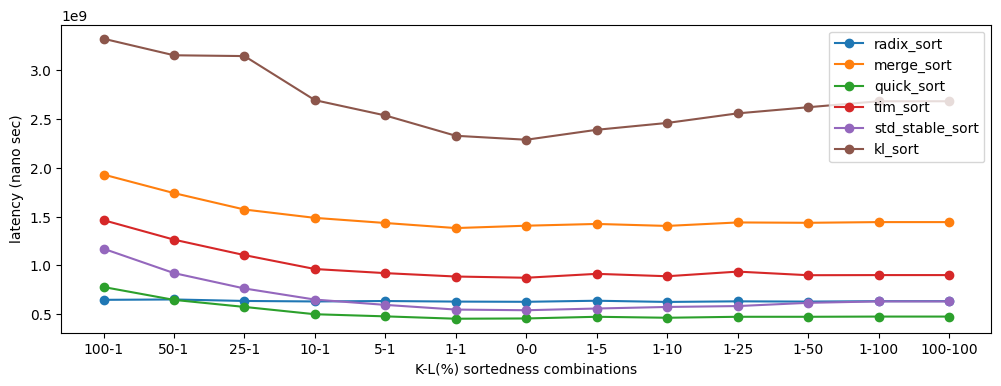

In [7]:
plt.figure(figsize=(12,4))
plt.plot(x, radix, marker='o', label="radix_sort")
plt.plot(x, merge, marker='o', label="merge_sort")
plt.plot(x, quick, marker='o', label="quick_sort")
plt.plot(x, tim, marker='o', label="tim_sort")
plt.plot(x, stable, marker='o', label="std_stable_sort")
plt.plot(x, kl, marker='o', label="kl_sort")
plt.xlabel("K-L(%) sortedness combinations")
plt.ylabel("latency (nano sec)")
plt.legend(loc='best')
# plt.savefig("output/result.png")
plt.show()

## KL parameter search

In [8]:
import seaborn as sns

df = pd.concat([
    pd.read_csv("./output/result_april26.csv", header=None),
    pd.read_csv("./output/result_kl_april26.csv", header=None),
    pd.read_csv("./output/result_kl_april27.csv", header=None),
    # pd.read_csv("./output/result_kl_2000.csv", header=None),
])

# Rename columns
df['k'] = df[0]
df['kdiv'] = df[1]
df['l'] = df[2]
df['ldiv'] = df[3]
df['algo'] = df[4]
df['latency'] = df[5] / 1e9

# Combine k-l
df['k-l'] = df['k'].astype(str) + '-' + df['l'].astype(str)
# Combine kdiv-ldiv
df['div'] = df['kdiv'].astype(str) + '-' + df['ldiv'].astype(str)

x = ["100-1", "50-1", "25-1", "10-1", "5-1", "0-0", "1-1", "1-5", "1-10", "1-25", "1-50", "1-100", "100-100"]
df = pd.concat([df[df['k-l'] == kl] for kl in x])

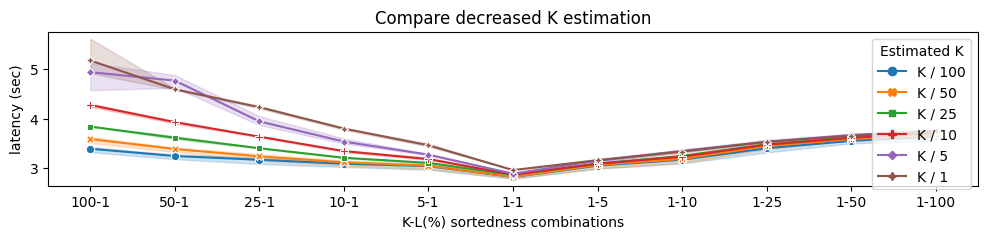

In [9]:
df_k = df[df['algo'] == 'kl_sort'] # Ensure only parse kl_sort
df_k = df_k[df_k['ldiv'] == 1] # Ensure only edit on k
df_k['Estimated K'] = "K / " + df_k['kdiv'].astype(str)
plt.figure(figsize=(12,2))
plt.title("Compare decreased K estimation")
plt.xlabel("K-L(%) sortedness combinations")
plt.ylabel("latency (sec)")
sns.lineplot(
    data=df_k,
    x="k-l", y="latency", hue="Estimated K", style="Estimated K",
    markers=True, dashes=False,
)
plt.savefig("images/k_decrease.png")

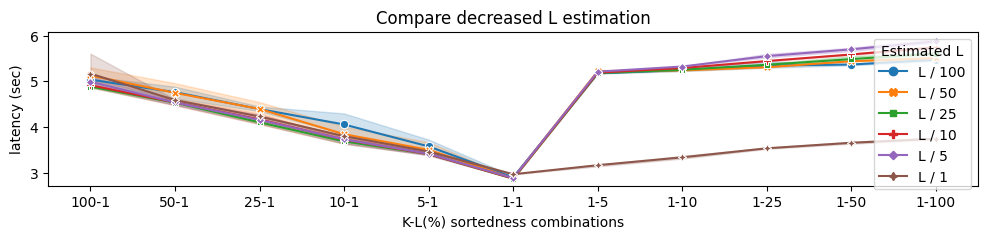

In [10]:
df_l = df[df['algo'] == 'kl_sort'] # Ensure only parse kl_sort
df_l = df_l[df_l['kdiv'] == 1] # Ensure only edit on l
df_l['Estimated L'] = "L / " + df_l['ldiv'].astype(str)
x = ["100-1", "50-1", "25-1", "10-1", "5-1", "0-0", "1-1", "1-5", "1-10", "1-25", "1-50", "1-100", "100-100"]
plt.figure(figsize=(12,2))
plt.title("Compare decreased L estimation")
plt.xlabel("K-L(%) sortedness combinations")
plt.ylabel("latency (sec)")
sns.lineplot(
    data=df_l,
    x="k-l", y="latency", hue="Estimated L", style="Estimated L",
    markers=True, dashes=False,
)
plt.savefig("images/l_decrease.png")

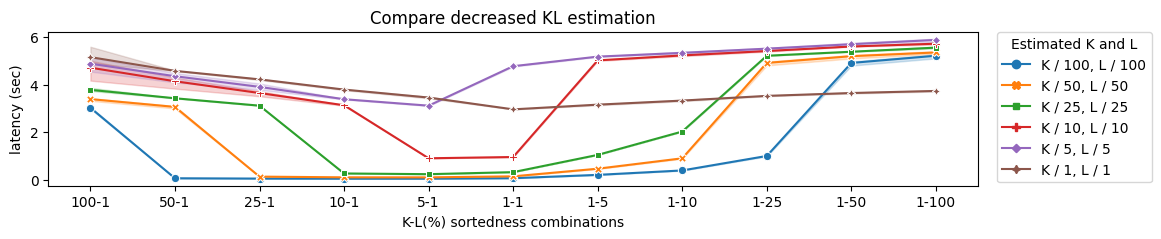

In [11]:
df_kl = df[df['algo'] == 'kl_sort'] # Ensure only parse kl_sort
df_kl = df_kl[df_kl['kdiv'] == df_kl['ldiv']] # Ensure only edit on both k and l
df_kl['legend'] = "K / " + df_kl['kdiv'].astype(str) + ", L / " + df_kl['ldiv'].astype(str)
x = ["100-1", "50-1", "25-1", "10-1", "5-1", "0-0", "1-1", "1-5", "1-10", "1-25", "1-50", "1-100", "100-100"]
plt.figure(figsize=(12,2))
plt.title("Compare decreased KL estimation")
plt.xlabel("K-L(%) sortedness combinations")
plt.ylabel("latency (sec)")
sns.lineplot(
    data=df_kl,
    x="k-l", y="latency", hue="legend", style="legend",
    markers=True, dashes=False,
)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Estimated K and L")
plt.savefig("images/kl_decrease.png")

## Comprehensive comparism

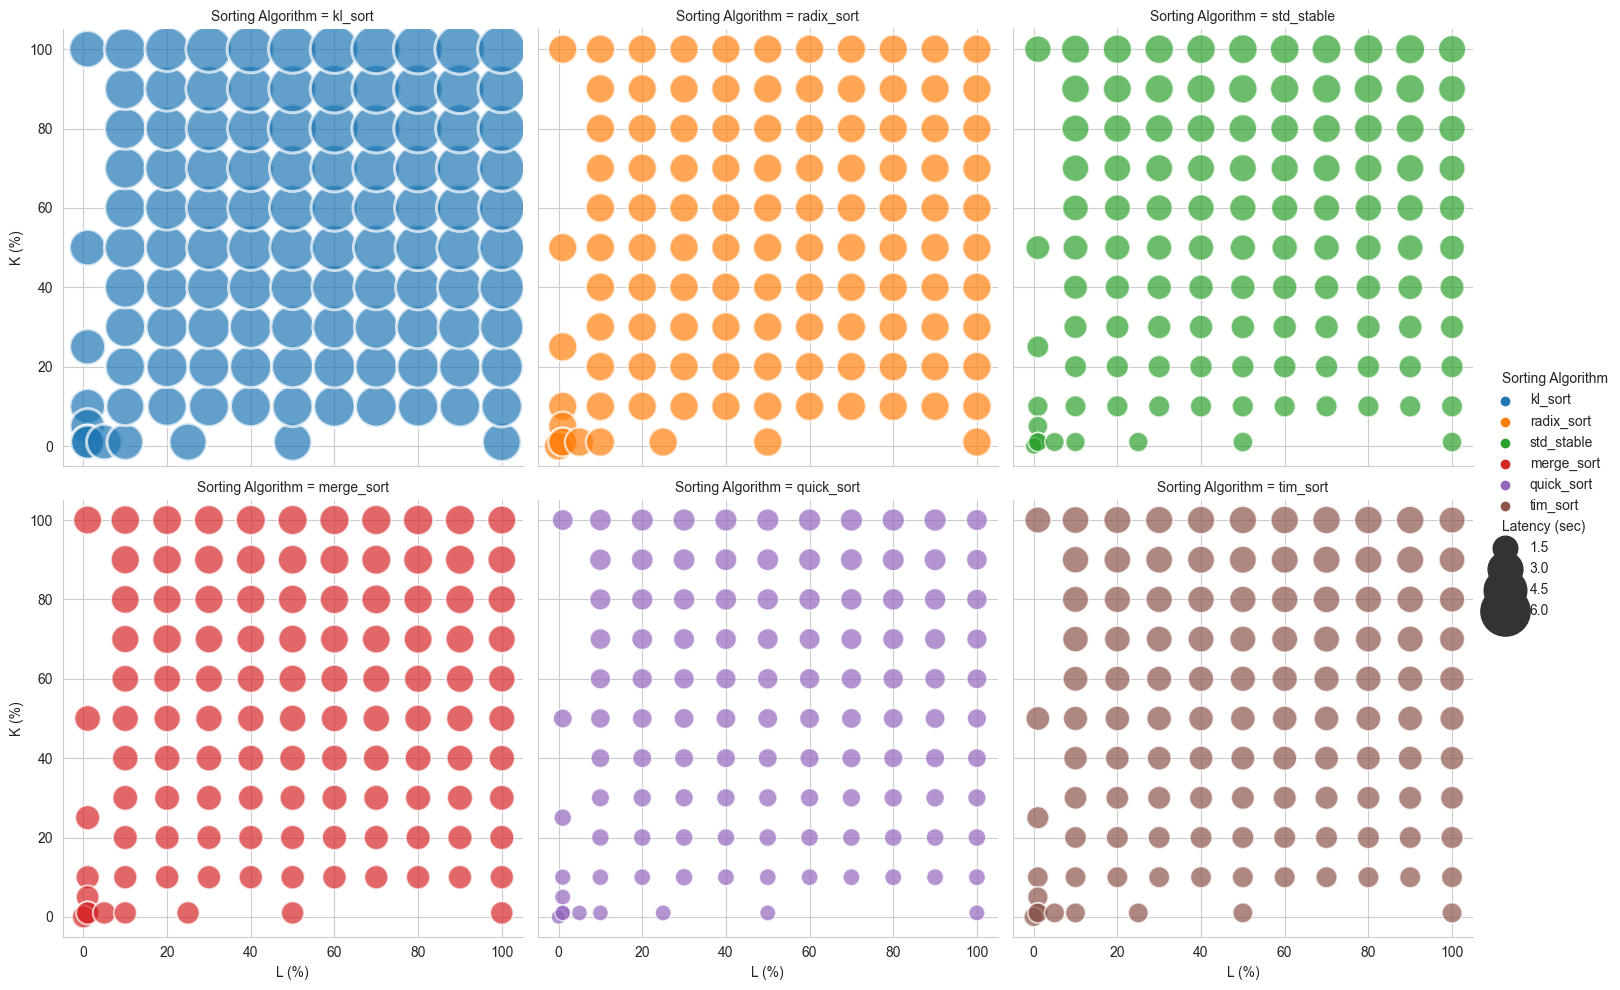

In [12]:
k_label = 'K (%)'
l_label = 'L (%)'
algo_label = 'Sorting Algorithm'
latency_label = 'Latency (sec)'
def rename_columns(df):
    # Rename columns
    df[k_label] = df[0]
    df['kdiv'] = df[1]
    df[l_label] = df[2]
    df['ldiv'] = df[3]
    df[algo_label] = df[4]
    df[latency_label] = df[5] / 1e9
    # Combine k-l
    df['k-l'] = df[k_label].astype(str) + '-' + df[l_label].astype(str)
    # Combine kdiv-ldiv
    df['div'] = df['kdiv'].astype(str) + '-' + df['ldiv'].astype(str)
    return df

df_kl = pd.read_csv("./output/result_kl_100.csv", header=None)
df_kl = rename_columns(df_kl)
df_kl = df_kl[df_kl['div'] == '100-1']

df_others = pd.read_csv("./output/result_others_april26.csv", header=None)
df_others = rename_columns(df_others)


df = pd.concat([
    df_kl, 
    df_others,
])

sns.set_style("whitegrid")
sns.relplot(
    data=df, x=l_label, y=k_label, hue=algo_label, size=latency_label,
    sizes=(1e-5, 1300), alpha=0.7, col=algo_label,
    kind="scatter", col_wrap=3,
)
plt.savefig("images/bubbles.png")

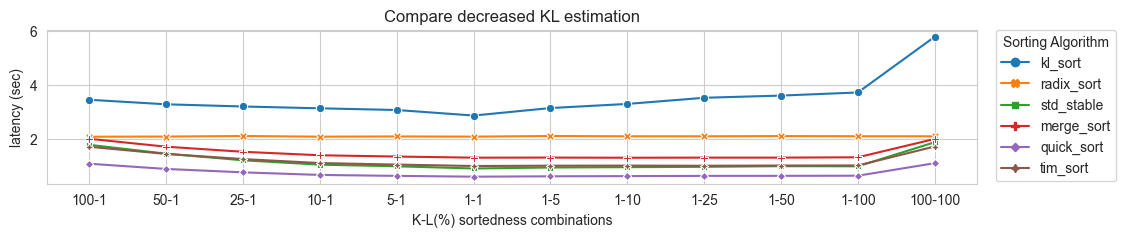

In [13]:
x = ["100-1", "50-1", "25-1", "10-1", "5-1", "1-1", "1-5", "1-10", "1-25", "1-50", "1-100", "100-100"]

# df_line = pd.concat(
#     [df_kl] + [df_others[df_others['k-l'] == kl] for kl in x]
# )
df_line = pd.concat([df[df['k-l'] == kl] for kl in x])

plt.figure(figsize=(12,2))
plt.title("Compare decreased KL estimation")
plt.xlabel("K-L(%) sortedness combinations")
plt.ylabel("latency (sec)")
sns.lineplot(
    data=df_line,
    x="k-l", y=latency_label, hue=algo_label, style=algo_label,
    markers=True, dashes=False,
)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title=algo_label)
plt.savefig("images/all_latency.png")